In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Data/time_series_data_human_activities.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp', 'activity', 'x-axis', 'y-axis', 'z-axis'])
df = df.sort_values(['user', 'activity', 'timestamp'])

/var/folders/8g/kz6p4g7s5s546qr4n5rm10t00000gn/T/ipykernel_8317/3088039086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='activity', order=df['activity'].value_counts().index, palette='Set2')


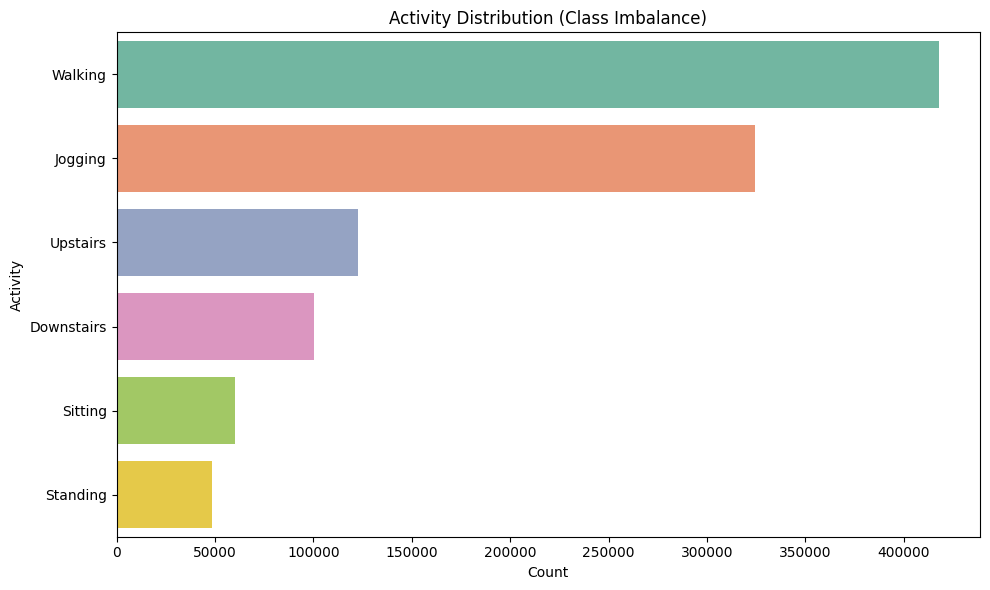

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='activity', order=df['activity'].value_counts().index, palette='Set2')
plt.title('Activity Distribution (Class Imbalance)')
plt.xlabel('Count')
plt.ylabel('Activity')
plt.tight_layout()
plt.savefig("activity_distribution.png", dpi=300)
plt.show()

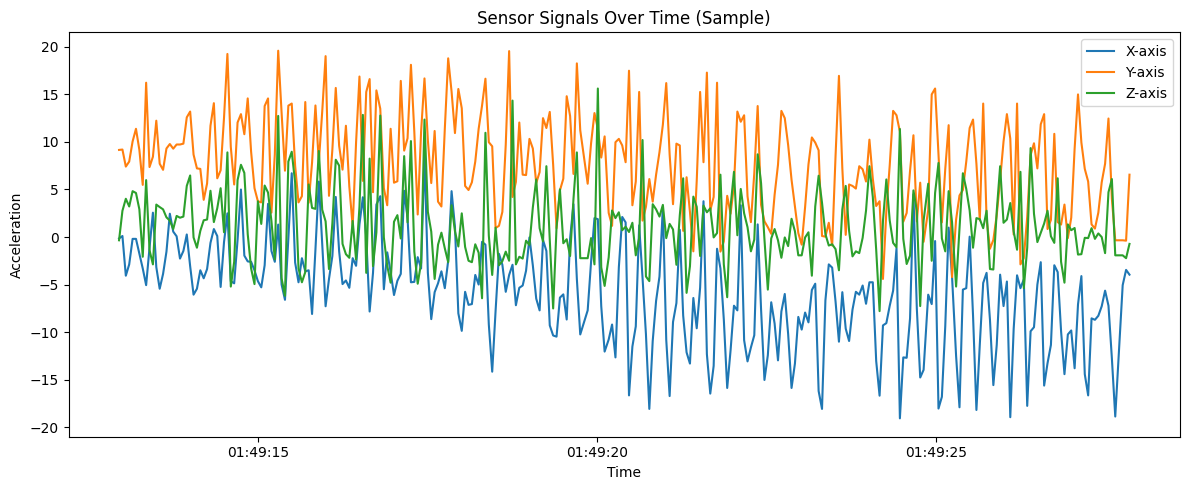

In [14]:
sample_df = df[(df['user'] == df['user'].iloc[0]) & (df['activity'] == df['activity'].iloc[0])].head(300)

plt.figure(figsize=(12, 5))
plt.plot(sample_df['timestamp'], sample_df['x-axis'], label='X-axis')
plt.plot(sample_df['timestamp'], sample_df['y-axis'], label='Y-axis')
plt.plot(sample_df['timestamp'], sample_df['z-axis'], label='Z-axis')
plt.title('Sensor Signals Over Time (Sample)')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.tight_layout()
plt.savefig("sensor_sample_plot.png", dpi=300)
plt.show()

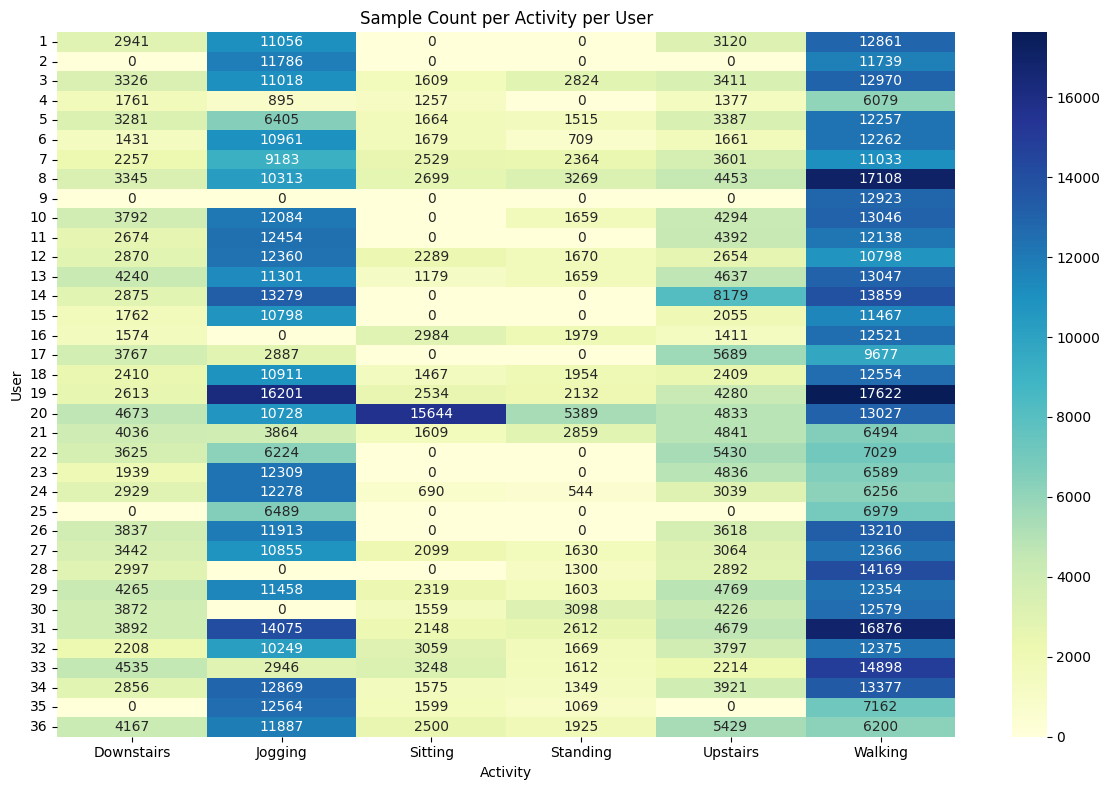

In [16]:
pivot_table = df.pivot_table(index='user', columns='activity', values='timestamp', aggfunc='count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Sample Count per Activity per User')
plt.xlabel('Activity')
plt.ylabel('User')
plt.tight_layout()
plt.savefig("user_activity_heatmap.png", dpi=300)
plt.show()